In [1]:
import re
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as ss
import matplotlib.pyplot as plt
from matplotlib import style, colors
from matplotlib import gridspec

matplotlib.style.use('ggplot')
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (8, 6)

use all calls from strelka: this is prefered since this takes into consideration of all soamtic calls:snvs and indels, high/moderate/low/modifier impacts.

In [2]:
def file_len(fname):
    i = 0
    with open(fname) as f:
        for line in f:
            if not re.match("^##", line):
                i+=1
    return i - 1

In [3]:
f1 = '/projects/trans_scratch/validations/workspace/szong/Cervical/variant_bwamem/124_patients/124_patients_bam_vcf.txt'
df = pd.read_csv(f1, sep='\t', index_col='patient')
df.head(2)

,HIV_status,DNA_lib,source,status,RNA_lib,ribodepleted_lib,DNA_bam,RNA_bam,DNA_single_vcf,paired_mpileup_vcf,...,other_vcf,DNA_tc,RNA_tc,cnv,bbt_transcriptome,bbt_genome,bbt_transcriptome_other_bacterial,bbt_genome_other_bacterial,bbt_transcriptome_other_viral,bbt_genome_other_viral
patient,,,,,,,,,,,,,,,,,,,,,
HTMCP-03-06-02001,Positive,A37234,HTMCP_124,Malignant,A37700,A56295,/projects/analysis/analysis22/A37234/merge_bwa...,/projects/analysis/analysis22/IX3433/C67GDANXX...,/projects/analysis/analysis22/A37234/merge_bwa...,NaN,...,NaN,55.0,55.0,/projects/somatic/NCI_SAIC_HIV_Cervical/HTMCP-...,/projects/NCI_validation2_assembly/NCI_SAIC_HI...,/projects/NCI_validation2_assembly/NCI_SAIC_HI...,/projects/NCI_validation2_assembly/NCI_SAIC_HI...,/projects/NCI_validation2_assembly/NCI_SAIC_HI...,/projects/NCI_validation2_assembly/NCI_SAIC_HI...,/projects/NCI_validation2_assembly/NCI_SAIC_HI...
HTMCP-03-06-02002,Negative,A37235,HTMCP_125,Malignant,A37701,A56296,/projects/analysis/analysis22/A37235/merge_bwa...,/projects/analysis/analysis22/IX3432/C67GDANXX...,/projects/analysis/analysis22/A37235/merge_bwa...,NaN,...,NaN,70.0,70.0,/projects/somatic/NCI_SAIC_HIV_Cervical/HTMCP-...,/projects/NCI_validation2_assembly/NCI_SAIC_HI...,/projects/NCI_validation2_assembly/NCI_SAIC_HI...,/projects/NCI_validation2_assembly/NCI_SAIC_HI...,/projects/NCI_validation2_assembly/NCI_SAIC_HI...,/projects/NCI_validation2_assembly/NCI_SAIC_HI...,/projects/NCI_validation2_assembly/NCI_SAIC_HI...


In [4]:
ndf = df[['strelka_snv_vcf', 'strelka_indel_vcf']].dropna()
ndf.head(2)

,strelka_snv_vcf,strelka_indel_vcf
patient,,
HTMCP-03-06-02001,/projects/somatic/NCI_SAIC_HIV_Cervical/HTMCP-...,/projects/somatic/NCI_SAIC_HIV_Cervical/HTMCP-...
HTMCP-03-06-02002,/projects/somatic/NCI_SAIC_HIV_Cervical/HTMCP-...,/projects/somatic/NCI_SAIC_HIV_Cervical/HTMCP-...


In [5]:
ndf.shape

(124, 2)

In [6]:
ndf['snv_counts'] = ndf['strelka_snv_vcf'].apply(lambda x: file_len(x))
ndf['indel_counts'] = ndf['strelka_indel_vcf'].apply(lambda x: file_len(x))

In [7]:
ndf['strelka_mutations'] = ndf.snv_counts + ndf.indel_counts
ndf.drop(['strelka_snv_vcf', 'strelka_indel_vcf'], axis=1, inplace=True)
ndf.head(2)

,snv_counts,indel_counts,strelka_mutations
patient,,,
HTMCP-03-06-02001,25732,1242,26974
HTMCP-03-06-02002,15964,697,16661


In [8]:
of = '/projects/trans_scratch/validations/workspace/szong/Cervical/variant_bwamem/124_patients/124_patients_strelka_snvs_indels_counts.txt'
# ndf.to_csv(of)

In [9]:
of = '/projects/trans_scratch/validations/workspace/szong/Cervical/variant_bwamem/124_patients/124_patients_strelka_snvs_indels_counts.txt'
df_strelka = pd.read_csv(of, index_col='patient')
df_strelka.head(2)

,snv_counts,indel_counts,strelka_mutations
patient,,,
HTMCP-03-06-02001,25732,1242,26974
HTMCP-03-06-02002,15964,697,16661


In [10]:
# df_strelka['log10_snv'] = np.log10(df_strelka.snv +1)
df_strelka['log10_sum'] = np.log10(df_strelka['strelka_mutations'])

In [11]:
df_strelka = df_strelka.query('patient != "HTMCP-03-06-02061"')
assert ('HTMCP-03-06-02061' in df_strelka.index) == False

In [12]:
df_strelka.head(2)

,snv_counts,indel_counts,strelka_mutations,log10_sum
patient,,,,
HTMCP-03-06-02001,25732,1242,26974,4.430945
HTMCP-03-06-02002,15964,697,16661,4.221701


In [13]:
# fixed histology
f2 = '/projects/trans_scratch/validations/workspace/szong/Cervical/HIV_cervical_analysis_master_tables_20171206.xls'
df2 = pd.read_excel(f2, sheetname='meta', index_col='patient')
df2.head(2)

,reanne_HIV_status,HPV_status,Clinical_histology,reanne_Putative_histology,comments
patient,,,,,
HTMCP-03-06-02001,Positive,Positive,Squamous Non-Keratinizing,Squamous,NaN
HTMCP-03-06-02002,Negative,Positive,Squamous Non-Keratinizing,Squamous,NaN


In [14]:
f3 = '/projects/trans_scratch/validations/workspace/szong/Cervical/variant_bwamem/124_patients/clinic_data_extracted.txt'
df3 = pd.read_csv(f3, sep='\t', index_col='bcr_patient_barcode')
df3.head(2)

,age_at_diagnosis,tumor_grade,ajcc_tumor_clinical_ct,clinical_stage,cd4_counts_at_diagnosis,hiv_rna_load_at_diagnosis,birth_days_to,menopause_status,height_cm_at_diagnosis,weight_kg_at_diagnosis,...,ecog_score,nadir_cd4_counts,cd4_counts_at_diagnosis.1,hiv_rna_load_at_diagnosis.1,histologic_diagnosis,haart_therapy_prior_to_dx,haart_therapy_at_dx,keratinization_squamous_cell,days_to_hiv_diagnosis,patient_id
bcr_patient_barcode,,,,,,,,,,,,,,,,,,,,,
HTMCP-03-06-02001,56.0,G2,T2b,Stage IIB,337.0,34.0,NaN,Post (prior bilateral ovariectomy OR >12 mo si...,158.0,44.5,...,1,NaN,337.0,34.0,Squamous Cell Carcinoma; Non-Keratinizing,YES,YES,Non-keratinizing squamous cell carcinoma,NaN,2001
HTMCP-03-06-02002,62.0,G3,T1b1,Stage IB1,NaN,NaN,-22934.0,Post (prior bilateral ovariectomy OR >12 mo si...,159.0,70.2,...,0,NaN,NaN,NaN,Squamous Cell Carcinoma; Non-Keratinizing,NaN,NaN,Non-keratinizing squamous cell carcinoma,NaN,2002


merge mutation and clinical data

In [15]:
dfm = pd.merge(df_strelka, df2, left_index=True, right_index=True)
dfm.head(2)

,snv_counts,indel_counts,strelka_mutations,log10_sum,reanne_HIV_status,HPV_status,Clinical_histology,reanne_Putative_histology,comments
patient,,,,,,,,,
HTMCP-03-06-02001,25732,1242,26974,4.430945,Positive,Positive,Squamous Non-Keratinizing,Squamous,NaN
HTMCP-03-06-02002,15964,697,16661,4.221701,Negative,Positive,Squamous Non-Keratinizing,Squamous,NaN


In [16]:
non_dup_cols = df3.columns.difference(dfm.columns)

In [17]:
non_dup_cols

Index(['age_at_diagnosis', 'ajcc_tumor_clinical_ct', 'birth_days_to',
       'cd4_counts_at_diagnosis', 'cd4_counts_at_diagnosis.1',
       'clinical_stage', 'days_to_hiv_diagnosis', 'ecog_score',
       'haart_therapy_at_dx', 'haart_therapy_prior_to_dx',
       'height_cm_at_diagnosis', 'histologic_diagnosis',
       'history_hormonal_contraceptives_use', 'hiv_rna_load_at_diagnosis',
       'hiv_rna_load_at_diagnosis.1', 'karnofsky_score',
       'keratinization_squamous_cell', 'live_birth_pregnancy_count',
       'menopause_status', 'nadir_cd4_counts', 'patient_id',
       'pregnancies_count_induced_abortion', 'pregnancies_count_miscarriage',
       'tobacco_smoking_history_indicator', 'total_pregnancy_count',
       'tumor_grade', 'weight_kg_at_diagnosis'],
      dtype='object')

In [18]:
dfm = pd.merge(dfm, df3[non_dup_cols], left_index=True, right_index=True, how='left')

In [19]:
dfm.shape

(123, 36)

In [20]:
dfm.head(3)

,snv_counts,indel_counts,strelka_mutations,log10_sum,reanne_HIV_status,HPV_status,Clinical_histology,reanne_Putative_histology,comments,age_at_diagnosis,...,live_birth_pregnancy_count,menopause_status,nadir_cd4_counts,patient_id,pregnancies_count_induced_abortion,pregnancies_count_miscarriage,tobacco_smoking_history_indicator,total_pregnancy_count,tumor_grade,weight_kg_at_diagnosis
patient,,,,,,,,,,,,,,,,,,,,,
HTMCP-03-06-02001,25732,1242,26974,4.430945,Positive,Positive,Squamous Non-Keratinizing,Squamous,NaN,56.0,...,5.0,Post (prior bilateral ovariectomy OR >12 mo si...,NaN,2001.0,NaN,1.0,1.0,6.0,G2,44.5
HTMCP-03-06-02002,15964,697,16661,4.221701,Negative,Positive,Squamous Non-Keratinizing,Squamous,NaN,62.0,...,8.0,Post (prior bilateral ovariectomy OR >12 mo si...,NaN,2002.0,3.0,NaN,1.0,11.0,G3,70.2
HTMCP-03-06-02003,7914,483,8397,3.924124,Positive,Positive,Squamous Non-Keratinizing,Squamous,NaN,39.0,...,4.0,Pre (<6 months since LMP AND no prior bilatera...,NaN,2003.0,NaN,NaN,1.0,5.0,G2,56.2


In [21]:
dfm[dfm.age_at_diagnosis.isnull()].shape

(30, 36)

In [22]:
dfm['reanne_HIV_status'].value_counts()

Positive    74
Negative    49
Name: reanne_HIV_status, dtype: int64

In [23]:
dfm['reanne_Putative_histology'].value_counts()

Squamous    102
Adeno        21
Name: reanne_Putative_histology, dtype: int64

In [24]:
# colors = ['red' if i=="Positive" else 'blue' for i in dfm['HIV_status']]
# dfm.plot('log10_snv', 'log10_indel', kind='scatter', c=colors)

In [25]:
dfm.head(2)

,snv_counts,indel_counts,strelka_mutations,log10_sum,reanne_HIV_status,HPV_status,Clinical_histology,reanne_Putative_histology,comments,age_at_diagnosis,...,live_birth_pregnancy_count,menopause_status,nadir_cd4_counts,patient_id,pregnancies_count_induced_abortion,pregnancies_count_miscarriage,tobacco_smoking_history_indicator,total_pregnancy_count,tumor_grade,weight_kg_at_diagnosis
patient,,,,,,,,,,,,,,,,,,,,,
HTMCP-03-06-02001,25732,1242,26974,4.430945,Positive,Positive,Squamous Non-Keratinizing,Squamous,NaN,56.0,...,5.0,Post (prior bilateral ovariectomy OR >12 mo si...,NaN,2001.0,NaN,1.0,1.0,6.0,G2,44.5
HTMCP-03-06-02002,15964,697,16661,4.221701,Negative,Positive,Squamous Non-Keratinizing,Squamous,NaN,62.0,...,8.0,Post (prior bilateral ovariectomy OR >12 mo si...,NaN,2002.0,3.0,NaN,1.0,11.0,G3,70.2


In [26]:
of2 = '/projects/trans_scratch/validations/workspace/szong/Cervical/variant_bwamem/124_patients/mutation_load_clinic.txt'
# dfm.to_csv(of2, sep='\t')

In [27]:

dfm = dfm[dfm.age_at_diagnosis.notnull()]

In [28]:
dfm[dfm.age_at_diagnosis.isnull()]

,snv_counts,indel_counts,strelka_mutations,log10_sum,reanne_HIV_status,HPV_status,Clinical_histology,reanne_Putative_histology,comments,age_at_diagnosis,...,live_birth_pregnancy_count,menopause_status,nadir_cd4_counts,patient_id,pregnancies_count_induced_abortion,pregnancies_count_miscarriage,tobacco_smoking_history_indicator,total_pregnancy_count,tumor_grade,weight_kg_at_diagnosis
patient,,,,,,,,,,,,,,,,,,,,,


In [29]:
# drop outliers to see if this results in better box plot and /or mann whiteney u test results (nonparametric test, should not matter)
# result still significant p=0.030, intead of p= 0.007
# dfm.drop(['HTMCP-03-06-02026', 'HTMCP-03-06-02007', 'HTMCP-03-06-02261', 'HTMCP-03-06-02262'], inplace=True)

different mutation burden in HIV + and - patients

In [30]:
f = of2 = '/projects/trans_scratch/validations/workspace/szong/Cervical/variant_bwamem/124_patients/mutation_load_clinic.txt'
df = pd.read_csv(f, index_col='patient', sep='\t')
df.head(2)

df.tmp = df.reanne_HIV_status.apply(lambda x: '+' if x == 'Positive' else '-')

assert (df.tmp.value_counts() == pd.Series({'+':74, '-':49})).all()

df['combo'] = df.reanne_Putative_histology + df.tmp

'tmp' in df.columns

False

In [31]:
df.columns

Index(['snv_counts', 'indel_counts', 'strelka_mutations', 'log10_sum',
       'reanne_HIV_status', 'HPV_status', 'Clinical_histology',
       'reanne_Putative_histology', 'comments', 'age_at_diagnosis',
       'ajcc_tumor_clinical_ct', 'birth_days_to', 'cd4_counts_at_diagnosis',
       'cd4_counts_at_diagnosis.1', 'clinical_stage', 'days_to_hiv_diagnosis',
       'ecog_score', 'haart_therapy_at_dx', 'haart_therapy_prior_to_dx',
       'height_cm_at_diagnosis', 'histologic_diagnosis',
       'history_hormonal_contraceptives_use', 'hiv_rna_load_at_diagnosis',
       'hiv_rna_load_at_diagnosis.1', 'karnofsky_score',
       'keratinization_squamous_cell', 'live_birth_pregnancy_count',
       'menopause_status', 'nadir_cd4_counts', 'patient_id',
       'pregnancies_count_induced_abortion', 'pregnancies_count_miscarriage',
       'tobacco_smoking_history_indicator', 'total_pregnancy_count',
       'tumor_grade', 'weight_kg_at_diagnosis', 'combo'],
      dtype='object')

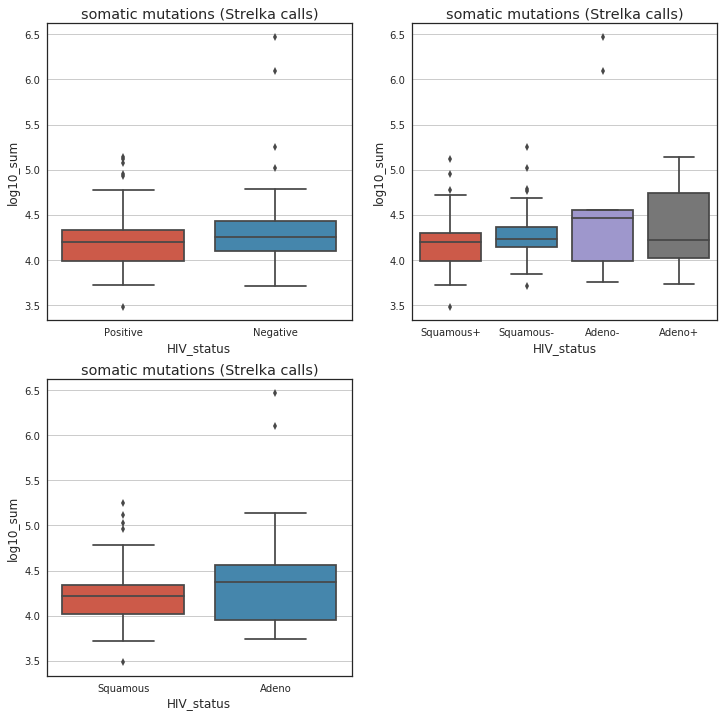

In [36]:
# boxplot
with plt.style.context("seaborn-whitegrid"):
    plt.rcParams["axes.edgecolor"] = "0.15"
    plt.rcParams["axes.linewidth"]  = 1.25
    fig = plt.figure(facecolor='w', figsize=(12,12))
    
    x1 = 'reanne_HIV_status'
    x2 = 'combo'
    x3 = 'reanne_Putative_histology'
    y = 'log10_sum'
    ax1 = plt.subplot(221)
    sns.boxplot(x1, y, data=df)
    ax1.set_title("somatic mutations (Strelka calls)")
    ax1.set(xlabel='HIV_status')
    
    ax2 = plt.subplot(222)
    sns.boxplot(x2, y, data=df)
    ax2.set(xlabel='HIV_status')
    ax2.set_title("somatic mutations (Strelka calls)")
    
    ax3 = plt.subplot(223)
    sns.boxplot(x3, y, data=df)
    ax3.set(xlabel='HIV_status')
    ax3.set_title("somatic mutations (Strelka calls)")
    
    of = '/projects/trans_scratch/validations/workspace/szong/Cervical/variant_bwamem/124_patients/mutations_load_HIV_plots.png'    
    plt.savefig(of)
    plt.show()
    plt.close()

# below are outdated

0 0 is 0.1039964486558819
0 1 is 0.248274809376615


/home/szong/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


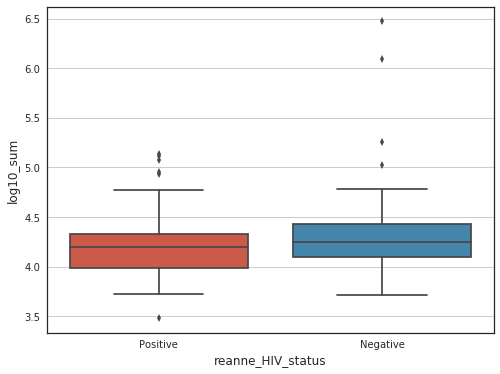

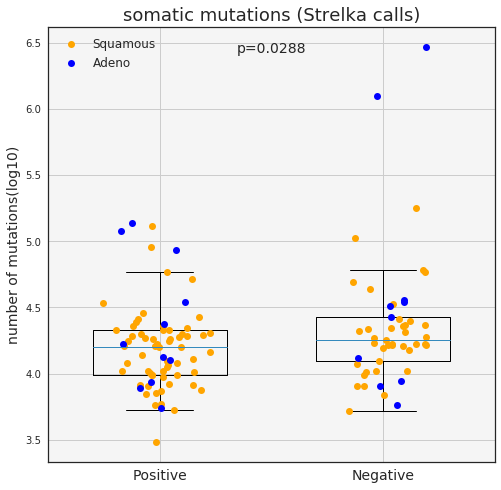

In [37]:
with plt.style.context("seaborn-whitegrid"):
    plt.rcParams["axes.edgecolor"] = "0.15"
    plt.rcParams["axes.linewidth"]  = 1.25
    fig = plt.figure(facecolor='w')
    sns.boxplot('reanne_HIV_status', 'log10_sum', data=df)

    value_cols = ['log10_sum']
    titles = ['somatic mutations (Strelka calls)']
    # boxplot overlaps individual data point
    fig, axes = plt.subplots(1, 1, figsize=(8, 8))

    # axes = axes.ravel()
    # group_col = 'combo'
    group_col = 'reanne_HIV_status'
    tissue_col = 'reanne_Putative_histology'
    categories = sorted(df[group_col].unique().tolist(), reverse=True) 
    tissues = sorted(df[tissue_col].unique().tolist(), reverse=True)
    p_values = {}
    for k, col in enumerate(value_cols):
    #     ax = axes[k]
        ax=axes
        value_col = col
        for position, cat in enumerate(categories):
            _ = ax.boxplot(df.query('{0} == "{1}"'.format(group_col, cat))[col], 
                       positions=[position], widths=(0.6), showfliers=False
                      )

        np.random.seed(0)
        grps = {}
        # overlay actuall data point based on tissue types
        for i, cat in enumerate(categories):
            # add jitter and specify maker facecolor and edgecolor               
            for j, tissue in enumerate(tissues):
                y = (df.query('{0}=="{1}" & {2}=="{3}"'.format(group_col, cat, tissue_col, tissue))[value_col])
                x = np.random.normal(i, 0.1, size=len(y))
        #         ax.scatter(x, y, s=30)
                lb = '' if i == 0 else tissue
                _ = ax.plot(x, y, mfc = ["orange","blue","yellow", "black"][j], 
                               mec='k', ms=7, marker="o", linestyle="None", label=lb)
                grps[i] = df.query('{0} == "{1}"'.format(group_col, cat))[col]
    #         show the unequal variance of each group, not equal
            print('{0} {1} is {2}'.format(k, i, np.var(grps[i])))
        # statistical test for 1st grp
        stats, p_U = ss.mannwhitneyu(grps[0], grps[1], use_continuity=True, alternative=None)
    #     statsT, p_T = ss.ttest_ind(grps[0], grps[1])
        p_U = round(p_U, 4)
    #     p_T = round(p_T, 4)
        _ = ax.text(0.5, 0.95,'p={}'.format(p_U), ha='center', va='center', transform=ax.transAxes, size=14) 
    #     _ = ax.text(0.3, 0.90,'p_Ttest={}'.format(p_T), ha='center', va='center', transform=ax.transAxes, size=14)     

        _ = ax.set_facecolor('whitesmoke') #specify plot backgroup color
        _ = ax.tick_params(axis='x', labelsize=14) #specify x tick label size
        _ = ax.set_xticks(range(position+1))
        _ = ax.set_xticklabels(categories, rotation=0, fontsize=14)
    #     ax.set_title(col)
        _ = ax.set_title('{}'.format(titles[k]), fontsize=18)
        _ = ax.set_xlim(xmin=-0.5)
        _= ax.set_ylabel('number of mutations(log10)', fontsize=14)
        ax.grid(True)
        _ = ax.legend(scatterpoints=1,
                  loc='upper left',
                  ncol=1,
                  fontsize=12)
    plt.suptitle('', fontsize=14)  
    of1 = '/projects/trans_scratch/validations/workspace/szong/Cervical/variant_bwamem/107_patients/mutations_load_HIV_plots_1.png'
    # plt.savefig(of1, dpi=200)

/home/szong/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


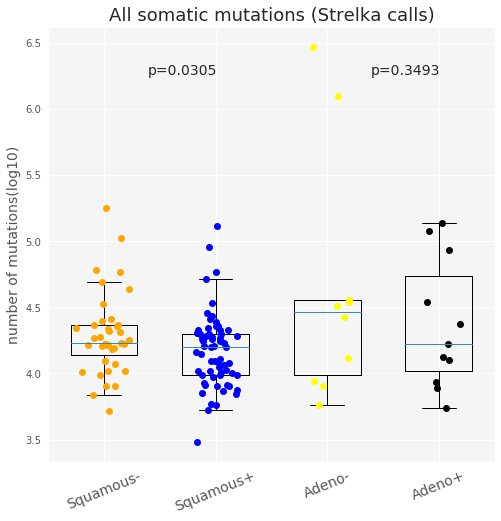

In [38]:

# separate into squamous and adeno, test HIV status difference.
value_cols = ['log10_sum']
titles = ['All somatic mutations (Strelka calls)']
# boxplot overlaps individual data point
fig, axes = plt.subplots(1,1, figsize=(8, 8))
# axes = axes.ravel()
group_col = 'combo'
# group_col = 'HIV_status'
categories = sorted(df[group_col].unique().tolist(), reverse=True) 
p_values = {}
for k, col in enumerate(value_cols):
    ax = axes
    value_col = col
    for position, cat in enumerate(categories):
        _ = ax.boxplot(df.query('{0} == "{1}"'.format(group_col, cat))[col], 
                   positions=[position], widths=(0.6), showfliers=False
                  );

    np.random.seed(0)
    
    grps = {}
    # overlay actuall data point
    for i, cat in enumerate(categories):
        # add jitter and specify maker facecolor and edgecolor
        y = df[value_col][df[group_col]==cat]
        x = np.random.normal(i, 0.1, size=len(y))
#         ax.scatter(x, y, s=30)
        _ = ax.plot(x, y, mfc = ["orange","blue","yellow", "black"][i], mec='k', ms=7, marker="o", linestyle="None")
        grps[i] = df.query('{0} == "{1}"'.format(group_col, cat))[col]

    # statistical test for 1st grp
    stats, p = ss.mannwhitneyu(grps[0], grps[1], use_continuity=True, alternative=None)
    p = round(p, 4)
    _ = ax.text(0.3, 0.9,'p={}'.format(p), ha='center', va='center', transform=ax.transAxes, size=14) 
    
    # statistical test fro 2nd grp
    stats, p = ss.mannwhitneyu(grps[2], grps[3], use_continuity=True, alternative=None)
    p = round(p, 4)
    _ = ax.text(0.8, 0.9,'p={}'.format(p), ha='center', va='center', transform=ax.transAxes, size=14)    
    
    ax.set_facecolor('whitesmoke') #specify plot backgroup color
    ax.tick_params(axis='x', labelsize=18) #specify x tick label size
    _ = ax.set_xticks(range(position+1))
    _ = ax.set_xticklabels(categories, rotation=22, fontsize=14)
#     ax.set_title(col)
    _ = ax.set_title('{}'.format(titles[k]), fontsize=18)
    _ = ax.set_xlim(xmin=-0.5)
    _= ax.set_ylabel('number of mutations(log10)', fontsize=14)
    ax.grid(True)

plt.suptitle('', fontsize=14)       

of1 = '/projects/trans_scratch/validations/workspace/szong/Cervical/variant_bwamem/107_patients/mutations_load_HIV_plots_2.png'
# plt.savefig(of1, dpi=200)